# <center>U.S. Medical Insurance Costs<center>
    
In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

The first step is to look through **insurance.csv** in order to get aquanted with the data. The following aspects of the data file will be checked in order to plan out how to import the data into a Python file:
* The names of columns and rows
* Any noticeable missing data
* Types of values (numerical vs. categorical)

## <span style="color: green;">1. Import data using csv module (for demo only)</span>

In [3]:
with open('insurance.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    line_count=0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            line_count +=1
    print(f'Processed {line_count} lines.')

Column names are age, sex, bmi, children, smoker, region, charges
Processed 1339 lines.


## <span style="color: green;">2. Exploratory Data Analysis <span style="color: green;">

In [4]:
import pandas as pd
data = pd.read_csv('insurance.csv')
print(data.shape)
print(data.columns)

(1338, 7)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


**insurance.csv** has 1337 rows (+ headers) and contains the following columns:
* Patient Age
* Patient Sex 
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geopraphical Region
* Patient Yearly Medical Insurance Cost

There are no signs of missing data.

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.shape

(1338, 7)

#### ---------------- Test formula insert function --------------------------

<img src="formulas/test.png" alt="Test" style="width: 500px;"/>

#### ------------------- END TESTING --------------------------

*describe* method gives an intial statistics on numerical variables, it excludes categorical variables.

In [9]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We will encode categorical variables with LabelEncoder (simple method when there is no real order in categorical variables). More on encoding for qualitative predictors will be discussed in a separate notebook series: Introduction to Statistical Learning (short review of the book)

In [5]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

In [11]:
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

Then, we check data correlation matrix. Strong correlation is observed with the smoking variable. Interestingly, the correlation with age is higher, than the correlation with BMI (body weight index).

* Note: the correlation is stronger the closer the coefficient to 1 in absolute value. The sign of the coefficient shows the direction of change.

In [13]:
# Check for any obviuos correlation
corr = data.corr()

<AxesSubplot:>

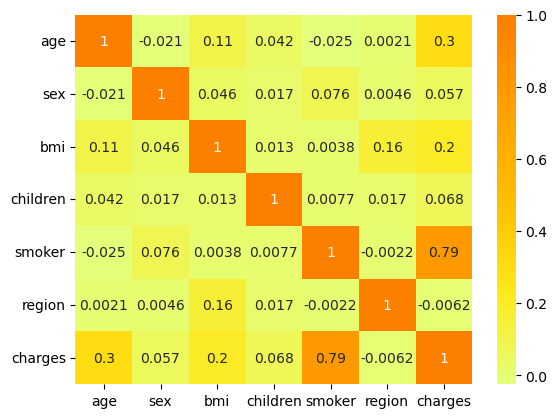

In [14]:
sns.heatmap(corr, cmap = 'Wistia', annot = True)

### <span style="color: green;">Inclusiveness: gender, age group and locations <span style="color: green;">

<AxesSubplot:xlabel='sex'>

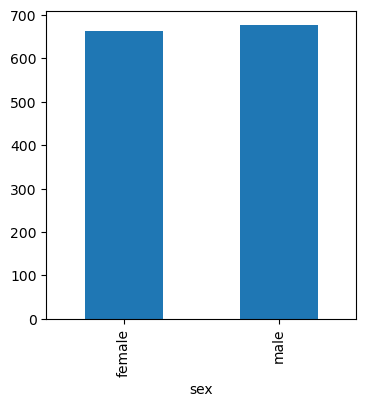

In [26]:
plt.figure(figsize=(4,4))
data.groupby(['sex'])['sex'].count().plot.bar()

<AxesSubplot:ylabel='Density'>

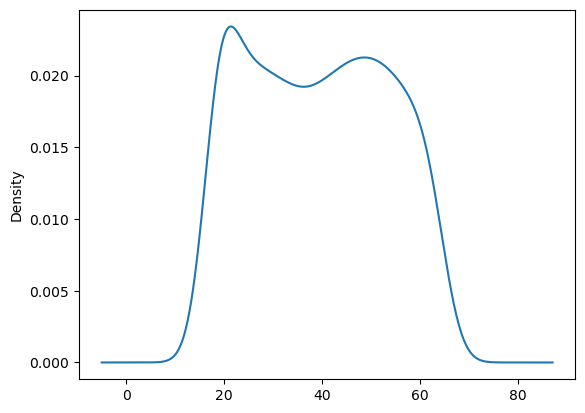

In [44]:
data['age'].plot.density()

<AxesSubplot:xlabel='region'>

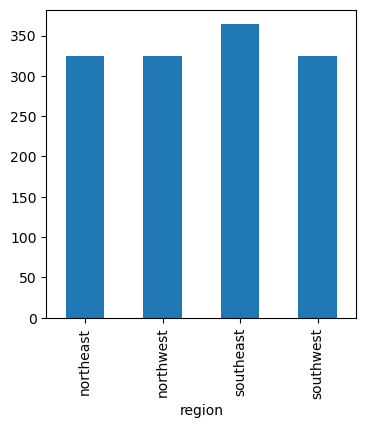

In [28]:
plt.figure(figsize=(4,4))
data.groupby(['region'])['region'].count().plot.bar()

Conclusion: the data set is inclusive in terms of gender and location. All the conclusions that we make should be specified only for the regions and population included in the dataset.

### <span style="color: green;">Distribution of Insurance Charges <span style="color: green;">

C:\Users\alina\anaconda3\envs\SAF_prescreening\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alina\anaconda3\envs\SAF_prescreening\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


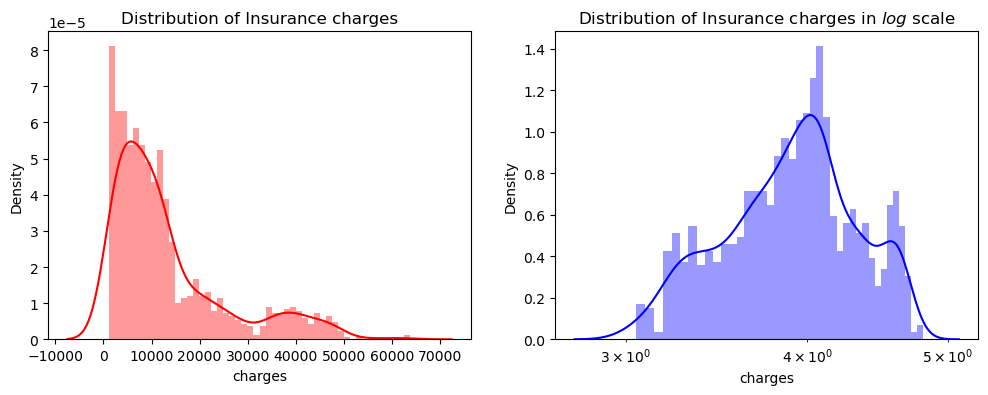

In [17]:
f = plt.figure(figsize = (12, 4))

ax = f.add_subplot(121)
sns.distplot(data['charges'], bins=50, color = 'r', ax=ax)
ax.set_title('Distribution of Insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(data['charges']), bins=40, color = 'b', ax=ax)
ax.set_title('Distribution of Insurance charges in $log$ scale')
ax.set_xscale('log')

The left figure shows how data is right skewed. For regression analysis log scale for targeted variable charges shoul be used. **LinearRegression** class from *sklearn.linear_model* takes care of this out-of-pocket. 

### <span style="color: green;">How do gender and being a smoker or non-smoker affect the cost of insurance? <span style="color: green;">

Text(0.5, 1.0, 'Violin plot of Charges vs Smoker')

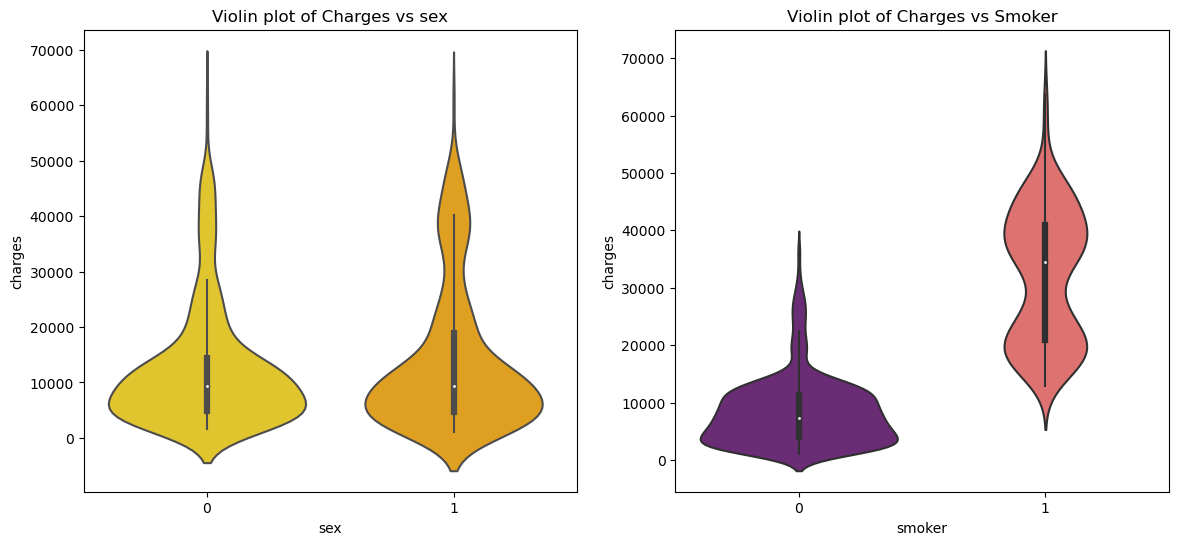

In [15]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y = 'charges', data = data, palette = 'Wistia', ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x = 'smoker', y = 'charges', data=data, palette = 'magma', ax=ax)
ax.set_title('Violin plot of Charges vs Smoker')

For both genders the insurance cost is in the same range. As expected, the plot on the right shows a connection between the cost and being a smoker/non-smoker. It is important to check even obviuos relationships in the dataset, to have a feeling about the reliability of data source.

### <span style="color: green;">How does number of children affect the cost of insurance? <span style="color: green;">

In [46]:
data.groupby('children').agg(['mean', 'min', 'max'])['charges']

C:\Users\alina\AppData\Local\Temp\ipykernel_24256\3596110172.py:1: FutureWarning: ['sex', 'smoker', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby('children').agg(['mean', 'min', 'max'])['charges']


,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


<AxesSubplot:xlabel='children'>

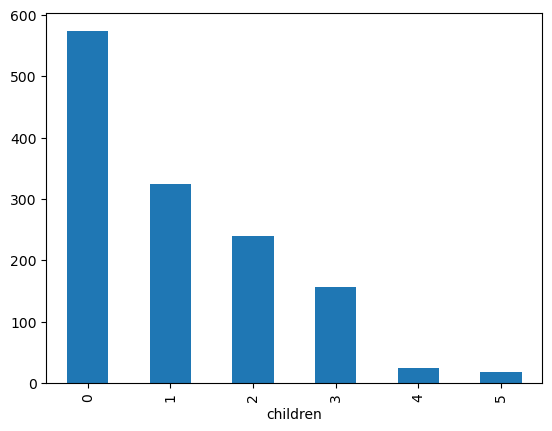

In [17]:
data.groupby('children')['children'].count().plot.bar()

Text(0.5, 1.0, 'Box plot of charges vs children')

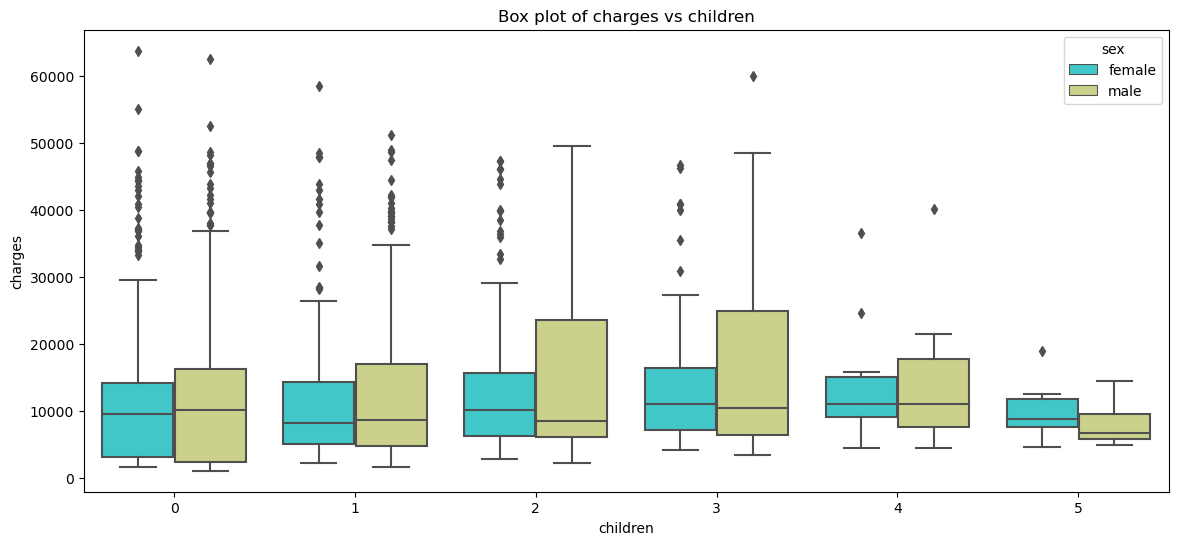

In [49]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y = 'charges', hue = 'sex', data = data, palette = 'rainbow')
plt.title('Box plot of charges vs children')

### How location affects the insurance charges?

Text(0.5, 1.0, 'Box plot of charges vs region')

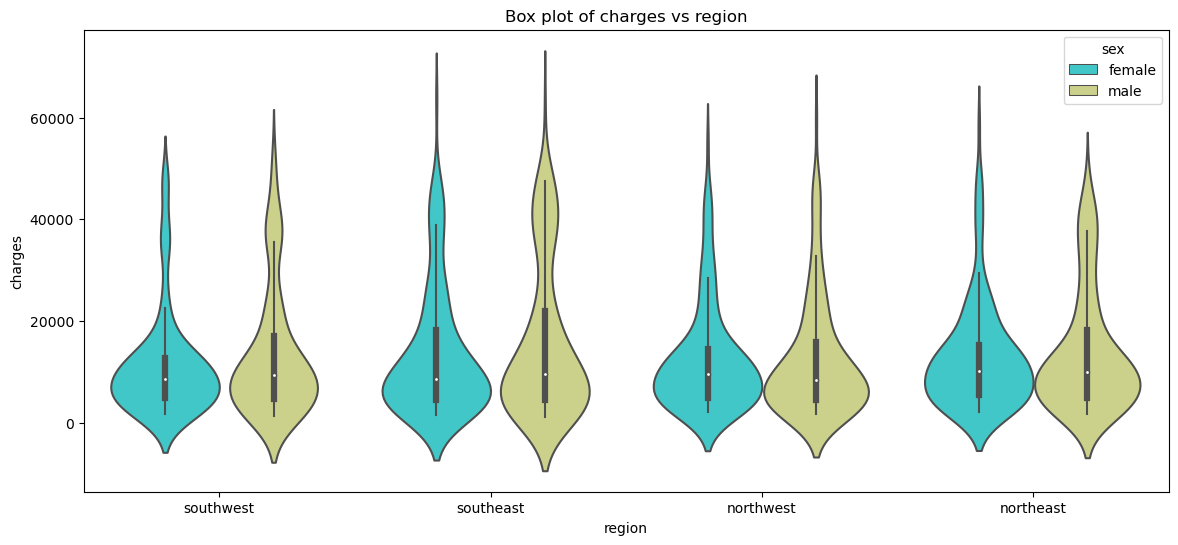

In [50]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y = 'charges', hue = 'sex', data = data, palette = 'rainbow')
plt.title('Box plot of charges vs region')

### Scatter plots

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

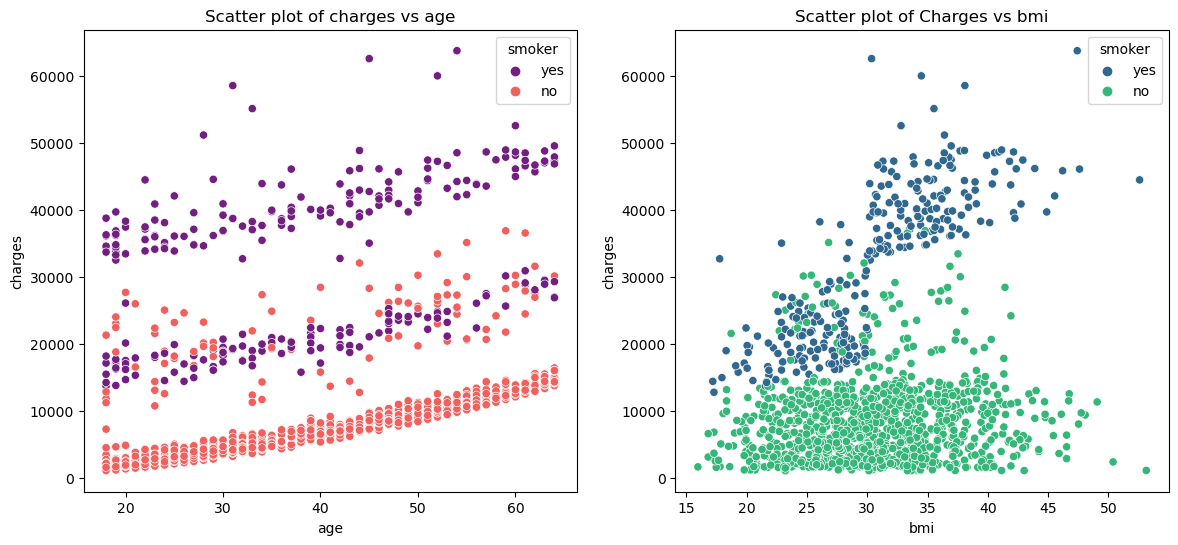

In [51]:
f = plt.figure(figsize=(14, 6))
ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=data, palette = 'magma', hue = 'smoker', ax=ax)
ax.set_title('Scatter plot of charges vs age')

ax=f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=data, palette='viridis', hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')

From the right: people with higher bmi have visibly higher insurance cost if they are smokers. With age insurance cost is growing approx with the same pace, though for smokers it is higher again.